In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ROLE_ID = "15900000057"
TITLE = "Role ID: " + ROLE_ID
DATA_PATH = "D:\\data\\WhyHeWins\\1590000117-1-onlyScore.csv"
df = pd.read_csv(DATA_PATH, encoding=)
print("Finally win: " + str(df['score'].sum()))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 0: invalid start byte

In [500]:
def update_count(score, count):
    if score > 0:
        return count
    return -count

def set_n_count(score, c_df):
    res = -c_df[c_df['score'] == -score].reset_index()['count']
    print(res[0])
    return res

In [501]:
c_df = df.groupby('score')['score'].count().to_frame("count").reset_index()
c_df

,score,count
0,-200,5
1,-175,1
2,-120,2
3,-100,2
4,-90,3
...,...,...
56,75,2
57,80,2
58,81,1
59,84,1


In [502]:
# c_df['new_count'] = c_df.apply(lambda r: update_count(r['score'], r['count']), axis=1)
# c_n_df = c_df[c_df['new_count'] < 0]
c_df_new = pd.DataFrame(columns=['score', 'p_count', 'n_count'])
c_df_new['score'] = c_df[c_df['score'] >= 0]['score']
c_df_new['p_count'] = c_df[c_df['score'] >= 0]['count']
c_df_new['n_count'] = c_df_new.apply(lambda r: set_n_count(r['score'], c_df), axis=1)
c_df_new
c_df[c_df['score'] == -200]['count'][0]

-2
-2
-13
-13
-12
-28
-1
-8
-1
-3
-5


IndexError: ('index out of bounds', 'occurred at index 42')

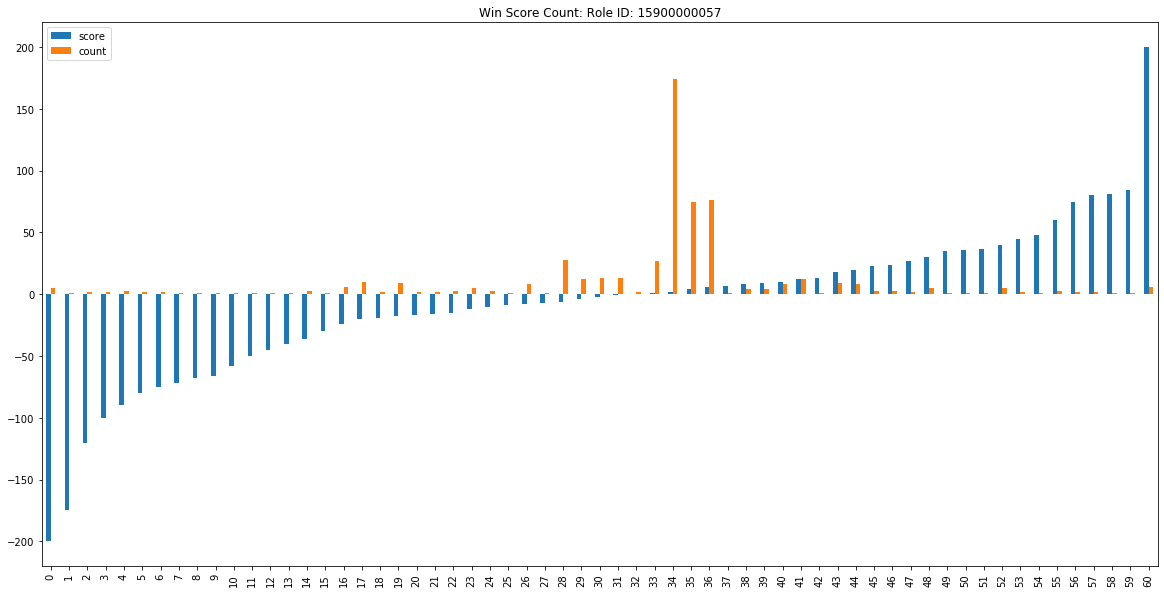

In [405]:
c_df.plot.bar(figsize=(20,10))
plt.title("Win Score Count: " + TITLE)
plt.show()

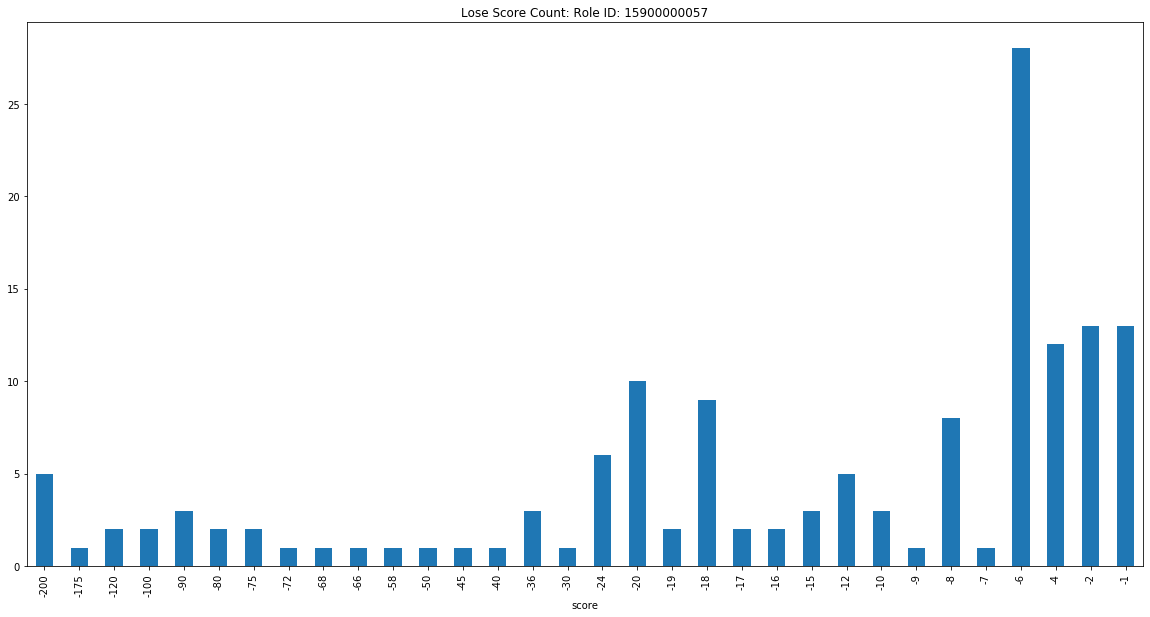

In [370]:
df[df['score'] < 0].groupby('score')['score'].count().plot.bar(figsize=(20,10))
plt.title("Lose Score Count: " + TITLE)
plt.show()

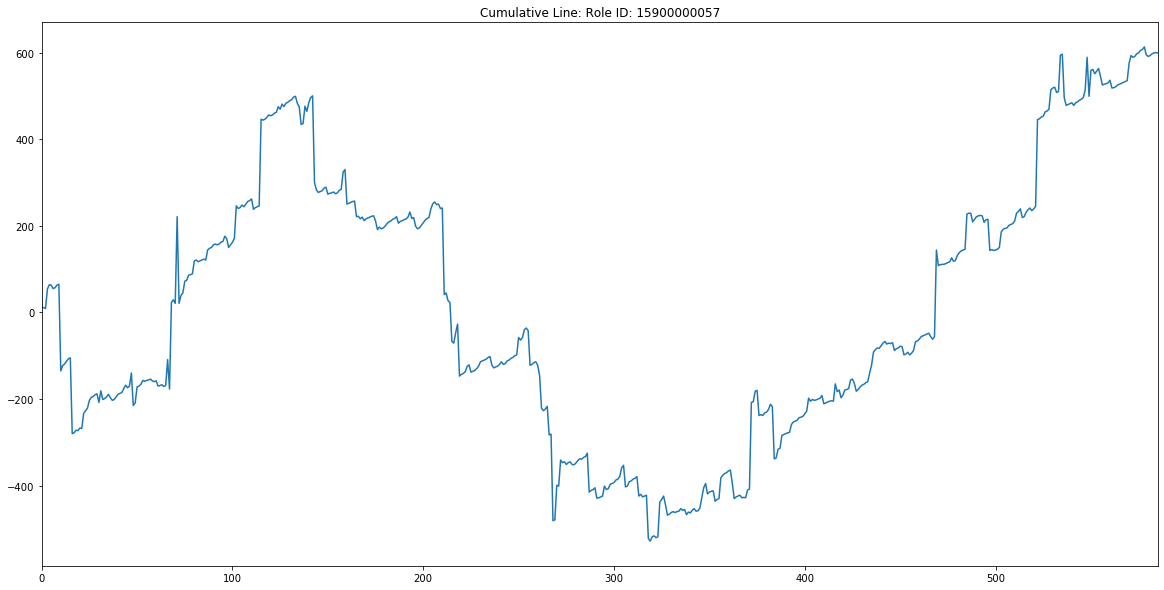

In [338]:
cum_df = df['score'].cumsum()
cum_df.plot(figsize=(20,10))
plt.title("Cumulative Line: " + TITLE)
plt.show()